¡Hola, Fernando!

Mi nombre es Tonatiuh Cruz. Me complace revisar tu proyecto hoy.

Al identificar cualquier error inicialmente, simplemente los destacaré. Te animo a localizar y abordar los problemas de forma independiente como parte de tu preparación para un rol como data-scientist. En un entorno profesional, tu líder de equipo seguiría un enfoque similar. Si encuentras la tarea desafiante, proporcionaré una pista más específica en la próxima iteración.

Encontrarás mis comentarios a continuación - **por favor no los muevas, modifiques o elimines**.

Puedes encontrar mis comentarios en cajas verdes, amarillas o rojas como esta:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Éxito. Todo está hecho correctamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Observaciones. Algunas recomendaciones.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Necesita corrección. El bloque requiere algunas correcciones. El trabajo no puede ser aceptado con comentarios en rojo.
</div>

Puedes responderme utilizando esto: 

<div class="alert alert-block alert-info">
<b>Comentario del alumno</b> <a class="tocSkip"></a>

<div class="alert alert-block alert-success">
<b>Resumen de la revisión 1</b> <a class="tocSkip"></a>

Hola Fernando! Has hecho un excelente trabajo, cada vez más cercas de convertirte en un cientifico de datos. Realizaste la carga de bases, su análisis inicial, sus ajustes, un análisis de algunos variables conmplementado con gráficas y el desarrollo de las pruebas de hipótesis. Solamente te dejo algunos comentarios para complementar el análisis. 

Sigue con el excelente trabajo!
</div>

## Paso 1: Carga y Explora los datos

In [36]:
#Importamos las librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import levene, ttest_ind

In [4]:
# Leer datos
data = pd.read_csv('/datasets/games.csv')

<div class="alert alert-block alert-success">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
Has realizado un excelente trabajo al importar los datos y las bibliotecas necesarias.

</div>

In [5]:
# Vista del data
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [6]:
# Dimensiones del DataFrame
data.shape

# Info general
data.info()

# Revisar valores únicos por columna
data.nunique()

# Revisar valores faltantes
data.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

## Paso 2: Preparar los datos

In [7]:
# Renombrar columnas a minusculas
data.columns = data.columns.str.lower()
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### Revisión y conversion de datos

In [8]:
# year_of_release
data['year_of_release'] = pd.to_numeric(data['year_of_release'], errors='coerce').astype('Int64') # Actualmente lo tenemos en un tipo float y lo pasamos a un tipo int

In [9]:
# user_score
# Tiene valores tbd (to be determined). Vamos a sustituir tbd por NaN y convertir a numérico.
data['user_score'] = data['user_score'].replace('tbd', np.nan)
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce')

In [10]:
# Lo multiplicamos por 10 para compararlo con "critic_score"
data['user_score_100'] = data['user_score'] * 10

### Tratamiento de los valores ausentes

- name: No se pueden recuperar, eliminar filas nulas
- year_of_release: Es dificil de imputar, se se necesita eliminar
- genre, rating: Se podrín imputar con "Unknown", pero pueden llegar afectar el análisis
- critic_score, user_score: Mantener en NaN si hacen falta, no imputar

In [11]:
# Eliminar juegos sin nombre
data = data[~data['name'].isna()]

# Rellenar rating vacío como 'Unknown'
data['rating'] = data['rating'].fillna('Unknown')

# Revisar nuevamente valores faltantes
data.isna().sum()

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         9123
rating                0
user_score_100     9123
dtype: int64

In [12]:
# Calculamos ventas totales
data['total_sales'] = (
    data['na_sales'] + 
    data['eu_sales'] + 
    data['jp_sales'] + 
    data['other_sales']
)

<div class="alert alert-block alert-success">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
Hola! Muy buen trabajo en la sección, ajustaste los nombres de las columnas a minúsculas con el uso de la función str.lower(), cambiaste el tipo de variable de la base de datos y muy buen trabajo con la suma de todas las ventas. 



## Paso 3: Analisis Exploratorio

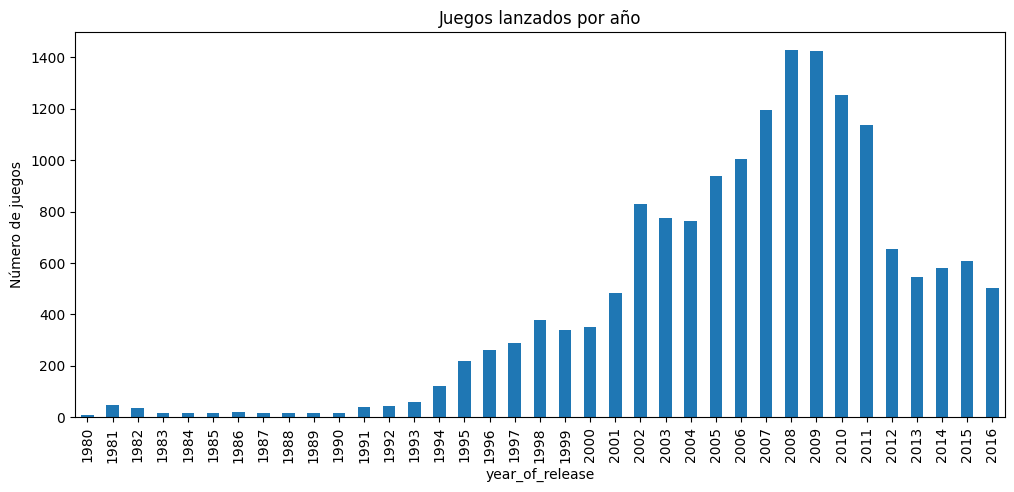

In [13]:
# Juegos lanzados por año

games_per_year = data.groupby('year_of_release')['name'].count()
games_per_year.plot(kind='bar', figsize=(12,5))
plt.title('Juegos lanzados por año')
plt.ylabel('Número de juegos')
plt.show()

<div class="alert alert-block alert-success">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
Gran trabajo, esta gráfica nos ayuda a entender el comportamiento del mercado de videojuegos en el tiempo



#### Conclusiones
- Se ve una caída importante en los ultimos años, posiblemente sean datos incompletos para 2016
- El mejor periodo para modelar suele ser 2013-2016

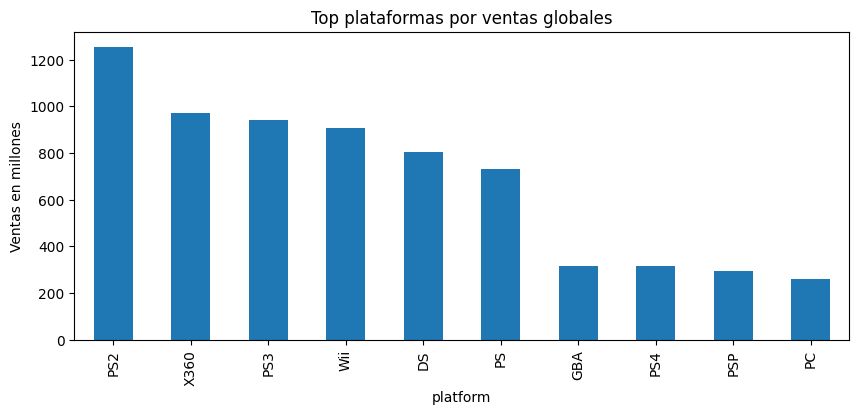

In [14]:
# Plataformas más exitosas (Plataformas por ventas globales)
platform_sales = data.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
platform_sales.head(10).plot(kind='bar', figsize=(10,4))
plt.title('Top plataformas por ventas globales')
plt.ylabel('Ventas en millones')
plt.show()

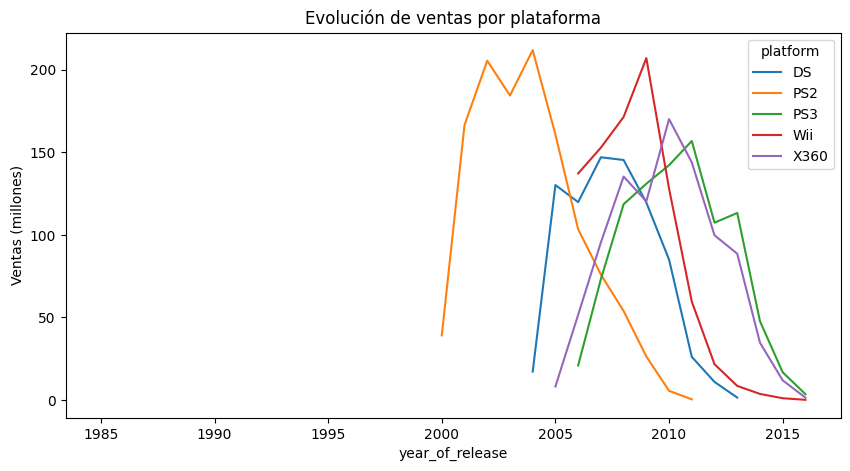

In [15]:
# Evaluacion de plataformas lideres
top_platforms = platform_sales.head(5).index.tolist()
platform_year_sales = (
    data[data['platform'].isin(top_platforms)]
    .groupby(['year_of_release', 'platform'])['total_sales']
    .sum()
    .unstack()
)

platform_year_sales.plot(figsize=(10,5))
plt.title('Evolución de ventas por plataforma')
plt.ylabel('Ventas (millones)')
plt.show()

#### Conclusión
- Podemos ver que algunas plataformas desaparecen tras 8-10 años.
- Nuevas plataformas tardan de 2 - 3 años en asentarse

In [16]:
recent_data = data[data['year_of_release'] >= 2013]

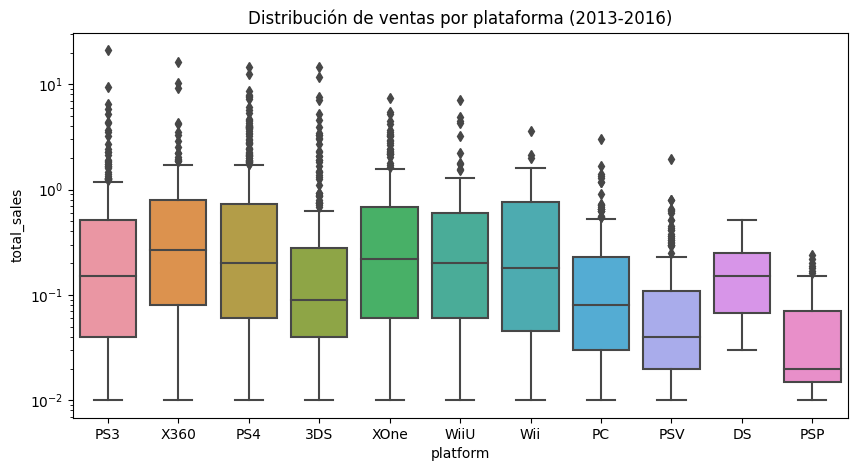

In [30]:
plt.figure(figsize=(10,5))
sns.boxplot(x='platform', y='total_sales', data=recent_data)
plt.yscale('log')
plt.title('Distribución de ventas por plataforma (2013-2016)')
plt.show()

<div class="alert alert-block alert-warning">
    <b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Muy buen trabajo con el desarrollo de la gráfica de cajas, este tipo de gráficos nos ayuda a comparar resultados de manera precisa. Solamente recuerda que los graficos de box-plot nos ayudan a identificar outliers que posteriomente en el desarrollo de las pruebas de hipótesis nos servirían eliminar para que no puedan sesgar nuestros resultados. 
</div>

#### Conclusiones

- Las plataformas presentan muchas ventas bajas y unos pocos éxitos con ventas muy altas
- PS4, X360 y XOne tienen mejores medianas, mostrando más juegos exitosos.
- Consolas antiguas como PSP y DS tienen menores ventas, reflejando su declive

### Reseñas y ventas

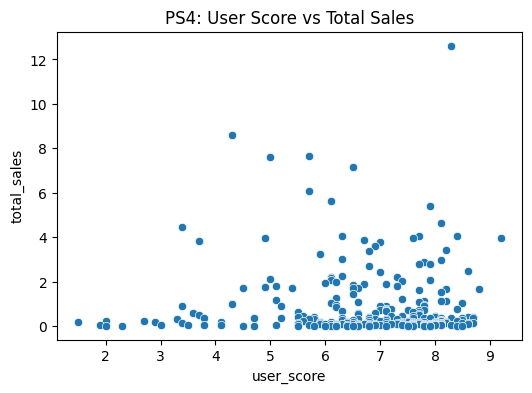

Correlación user_score vs total_sales en PS4: -0.032


In [18]:
# PS4
ps4_data = recent_data[(recent_data['platform'] == 'PS4') &
                       (~recent_data['user_score'].isna())]

# Scatter
plt.figure(figsize=(6,4))
sns.scatterplot(x='user_score', y='total_sales', data=ps4_data)
plt.title('PS4: User Score vs Total Sales')
plt.show()

# Correlación
corr = ps4_data['user_score'].corr(ps4_data['total_sales'])
print(f'Correlación user_score vs total_sales en PS4: {corr:.3f}')

<div class="alert alert-block alert-success">
    <b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Excelente forma de analizar la relación entre las ventas y las scores

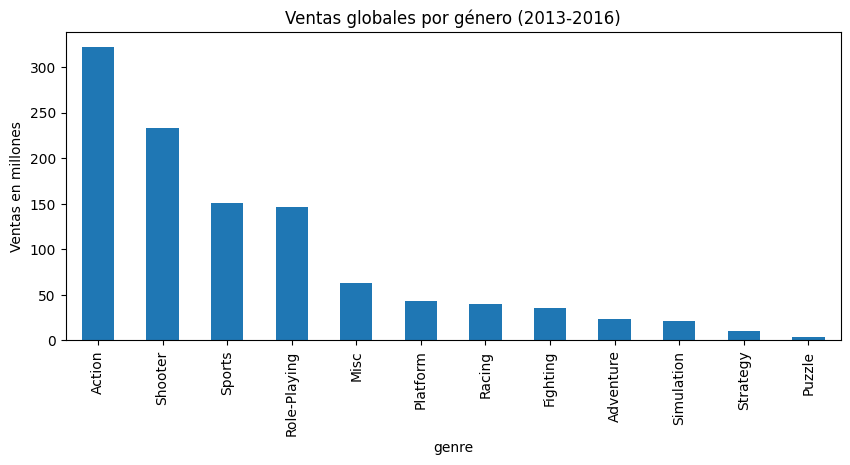

In [19]:
# Generos más rentables
genre_sales = recent_data.groupby('genre')['total_sales'].sum().sort_values(ascending=False)
genre_sales.plot(kind='bar', figsize=(10,4))
plt.title('Ventas globales por género (2013-2016)')
plt.ylabel('Ventas en millones')
plt.show()

#### Conclusiones
- Tenemos que los juegos de acción y disparos dominan las ventas

## Paso 4: Perfil de usuario por región

In [20]:
# Top 5 plataformas por región

na_platforms = (
    recent_data.groupby('platform')['na_sales']
    .sum()
    .sort_values(ascending=False)
    .head(5)
)
print(na_platforms)

platform
PS4     108.74
XOne     93.12
X360     81.66
PS3      63.50
3DS      38.20
Name: na_sales, dtype: float64


In [21]:
na_platforms = (
    recent_data.groupby('platform')['jp_sales']
    .sum()
    .sort_values(ascending=False)
    .head(5)
)
print(na_platforms)

platform
3DS     67.81
PS3     23.35
PSV     18.59
PS4     15.96
WiiU    10.88
Name: jp_sales, dtype: float64


In [22]:
na_platforms = (
    recent_data.groupby('platform')['eu_sales']
    .sum()
    .sort_values(ascending=False)
    .head(5)
)
print(na_platforms)


platform
PS4     141.09
PS3      67.81
XOne     51.59
X360     42.52
3DS      30.96
Name: eu_sales, dtype: float64


In [23]:
# Top 5 generos en cada región

na_genres = (
    recent_data.groupby('genre')['na_sales']
    .sum()
    .sort_values(ascending=False)
    .head(5)
)
print(na_genres)

genre
Action          126.05
Shooter         109.74
Sports           65.27
Role-Playing     46.40
Misc             27.49
Name: na_sales, dtype: float64


In [24]:
na_genres = (
    recent_data.groupby('genre')['jp_sales']
    .sum()
    .sort_values(ascending=False)
    .head(5)
)
print(na_genres)

genre
Role-Playing    51.04
Action          40.49
Misc             9.20
Fighting         7.65
Shooter          6.61
Name: jp_sales, dtype: float64


In [25]:
na_genres = (
    recent_data.groupby('genre')['eu_sales']
    .sum()
    .sort_values(ascending=False)
    .head(5)
)
print(na_genres)

genre
Action          118.13
Shooter          87.86
Sports           60.52
Role-Playing     36.97
Racing           20.19
Name: eu_sales, dtype: float64


In [26]:
# ESRB rating en cada región
region_cols = ['na_sales', 'jp_sales', 'eu_sales']

for region in region_cols:
    ratings = (
        recent_data.groupby('rating')[region]
        .sum()
        .sort_values(ascending=False)
    )
    print(f'\n{region}:\n', ratings)


na_sales:
 rating
M          165.21
Unknown     89.42
E           79.05
E10+        54.24
T           49.79
Name: na_sales, dtype: float64

jp_sales:
 rating
Unknown    85.05
T          20.59
E          15.14
M          14.11
E10+        5.89
Name: jp_sales, dtype: float64

eu_sales:
 rating
M          145.32
E           83.36
Unknown     78.91
E10+        42.69
T           41.95
Name: eu_sales, dtype: float64


<div class="alert alert-block alert-success">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>

Excelente! Con este análisis por región ayuda a complementar el análisis general anterior y a hacer zoom a los resultados por cada una de las regiones.   

</div>

#### Conclusiones
- Los ratings más altos afectan Japón menos que occidente
- E y T dominan en occidente

## Paso 5: Prueba de hipotesis

### Hipotesis 1:

- H0: Las calificaciones promedio de los usuarios para xbox one y PC son iguales
- H1: Son diferentes

In [38]:
# Datos
xone_scores = recent_data[(recent_data['platform'] == 'XOne')]['user_score'].dropna()
pc_scores = recent_data[(recent_data['platform'] == 'PC')]['user_score'].dropna()

# Levene
stat_levene, p_levene = levene(xone_scores, pc_scores)
print(f"p-valor Levene: {p_levene:.5f}")

if p_levene > alpha:
    print("No se rechaza H0: las varianzas son iguales.")
    equal_var = True
else:
    print("Se rechaza H0: las varianzas son distintas.")
    equal_var = False

# t-test
t_stat, p_value = ttest_ind(xone_scores, pc_scores, equal_var=equal_var)
print(f"p-valor t-test: {p_value:.5f}")

if p_value < alpha:
    print("Se rechaza H0: las medias son distintas.")
else:
    print("No se puede rechazar H0: las medias podrían ser iguales.")


p-valor Levene: 0.00390
Se rechaza H0: las varianzas son distintas.
p-valor t-test: 0.14760
No se puede rechazar H0: las medias podrían ser iguales.


### Hipótesis 2:

- H0: Las calificiaciones promedio de los géneros Acción y Disparos son iguales
- H1: Son diferentes

In [37]:
# Datos
action_scores = recent_data[(recent_data['genre'] == 'Action')]['user_score'].dropna()
sports_scores = recent_data[(recent_data['genre'] == 'Sports')]['user_score'].dropna()

# Prueba de Levene
alpha = 0.05
stat_levene, p_levene = levene(action_scores, sports_scores)
print(f"p-valor Levene: {p_levene:.5f}")

if p_levene > alpha:
    print("No se rechaza H0: las varianzas son iguales.")
    equal_var = True
else:
    print("Se rechaza H0: las varianzas son distintas.")
    equal_var = False

# Prueba t de Student
t_stat, p_value = ttest_ind(action_scores, sports_scores, equal_var=equal_var)
print(f"p-valor t-test: {p_value:.5f}")

if p_value < alpha:
    print("Se rechaza H0: las medias son distintas.")
else:
    print("No se puede rechazar H0: las medias podrían ser iguales.")

p-valor Levene: 0.00000
Se rechaza H0: las varianzas son distintas.
p-valor t-test: 0.00000
Se rechaza H0: las medias son distintas.


 <div class="alert alert-block alert-danger">
<b>Comentario revisor</b> <a class="tocSkip"></a>

Para estas pruebas te recomiendo hacer una prueba de  Levene  para mostrar si las varianzas son iguales y agregarlo dentro de la función. Actualmente lo colocar como equal_var=False. Para esto, primero debes calcular las varianzas para cada uno de las plataformas y en un segundo tiempo debes de hacer uso de la siguiente función: 
    
    levene(xone_scores, pc_scores)
    
Adoptaremos un nivel de significancia de 0.05; si el valor p resultante es mayor a 0.05, no podemos rechazar la hipótesis nula, y si es menor a 0.05, rechazamos la hipótesis nula, indicando que las varianzas no son iguales. 
    
Solamente recuerda que la prueba de levene no es sustituto a la prueba de st.ttest_ind, más bien es complemento para saber que colocar dentro del elemento "equal_var". En este caso como rechazamos la hipótesis de varianzas iguales debemos de colocar False. Es por eso que para terminar la prueba debes de realizar la prueba de st.ttest_ind considernado el resultado de la prueba realizada de levene    
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Gran trabajo con el ajuste!

## Paso 6: Conclusiones

- Los datos anteriores a 2013 son menos relevantes.

- PS4, XOne y 3DS lideran ventas globales entre 2013-2016.

- Géneros de Acción y Deportes dominan en ventas.

- En NA y EU dominan plataformas de sobremesa; JP es más portátil.

- No siempre hay fuerte correlación entre puntuaciones y ventas, aunque existen tendencias.

- ESRB impacta más en occidente que en Japón.